# Lemonade Exercises


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('lemonade.csv')

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


1. Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?


In [8]:
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [9]:
# at a multiplier of 1.5:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col])
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : 16.700000000000003
 Upper bound for Temperature: 104.7

-----------------
 Lower bound for Rainfall : 0.26
 Upper bound for Rainfall: 1.3

-----------------
 Lower bound for Flyers : 4.0
 Upper bound for Flyers: 76.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : 5.0
 Upper bound for Sales: 45.0

-----------------


2. Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?



    - For the both the upper and lower bounds, the sales, rainfall, and temperatures all make sense and should not be deleted

3. Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [13]:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], mult=3)
        print(f' Lower bound for {col} : {lower_bound}\n Upper bound for {col}: {upper_bound}\n')
        print('-----------------')
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (df[col] < lower_bound)]
    else:
        pass

 Lower bound for Temperature : -16.299999999999997
 Upper bound for Temperature: 137.7

-----------------
 Lower bound for Rainfall : -0.13
 Upper bound for Rainfall: 1.69

-----------------
 Lower bound for Flyers : -23.0
 Upper bound for Flyers: 103.0

-----------------
 Lower bound for Price : 0.5
 Upper bound for Price: 0.5

-----------------
 Lower bound for Sales : -10.0
 Upper bound for Sales: 60.0

-----------------


4. Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


     - When using the multiplier of 3, for the lower bounds, I would say that price, sales, rainfall, and flyers don't make sens and should be removed. For the upper bounds, I would say that price and temperature don't make sense

5. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

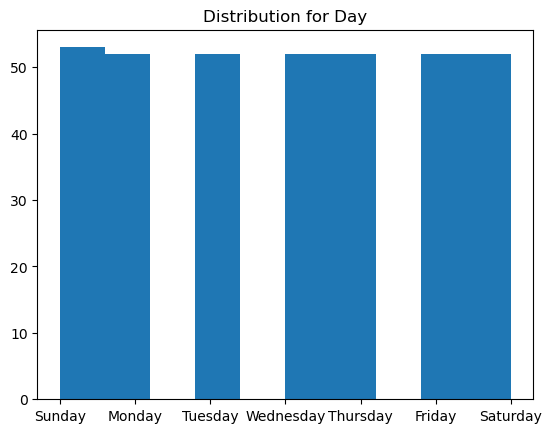

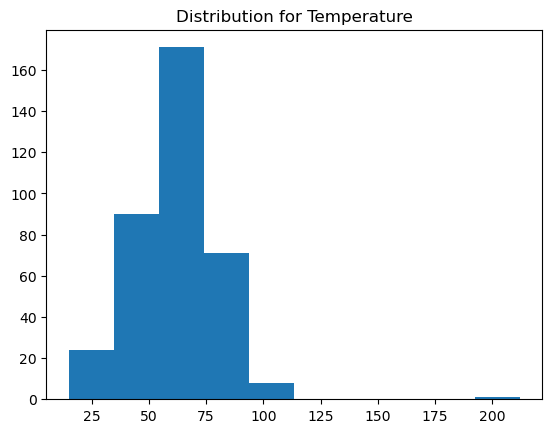

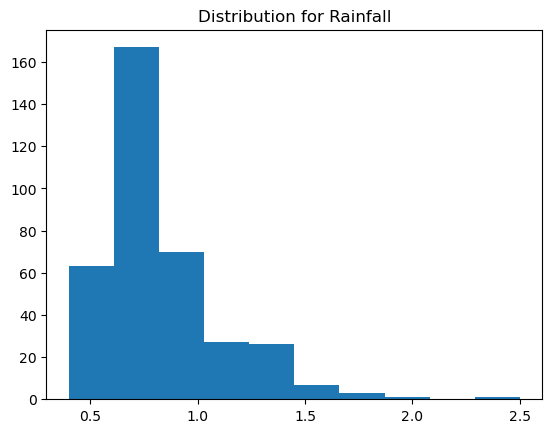

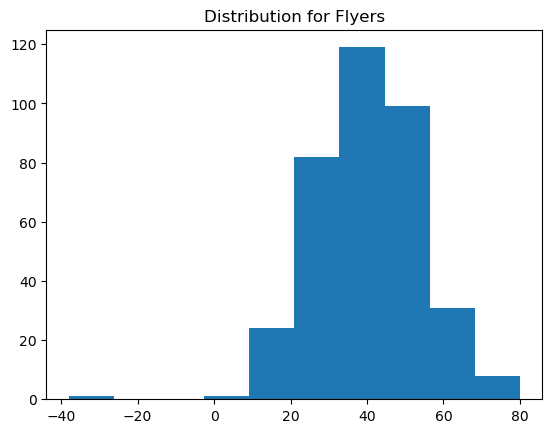

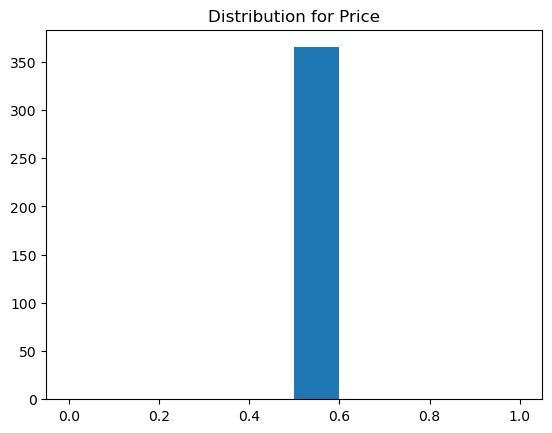

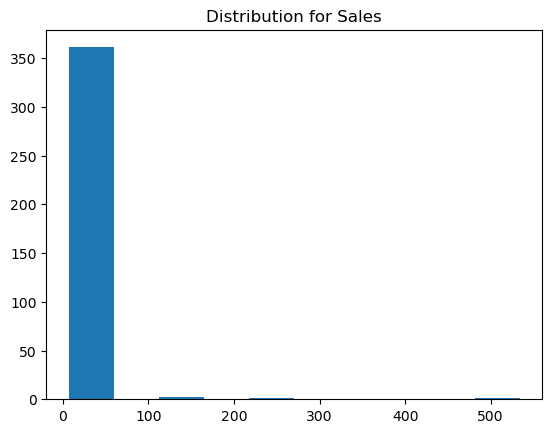

In [18]:
for col in df.columns:
    
    plt.hist(x=col, data=df)
    
    plt.title(f'Distribution for {col}')
    plt.show()

I would say that temperature and flyers both have a normal distribution

- Use a 2 sigma decision rule to isolate the outliers.

In [22]:
# Calculate the z-score 
zscores = pd.Series((df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std())

# Finds all of the observations two standard deviations or more.
df[zscores.abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-26,Monday,102.6,0.47,60,0.5,42
2017-07-01,Saturday,102.9,0.47,59,0.5,143
2017-07-10,Monday,98.0,0.49,66,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41
2017-07-22,Saturday,99.6,0.47,49,0.5,42
2017-07-27,Thursday,97.9,0.47,74,0.5,43
2017-12-05,Tuesday,22.0,1.82,11,0.5,10


In [23]:
# Calculate the z-score 
zscores = pd.Series((df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std())

# Finds all of the observations two standard deviations or more.
df[zscores.abs() >= 2]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-20,Tuesday,85.1,0.54,70,0.5,37
2017-06-21,Wednesday,94.3,0.47,76,0.5,41
2017-07-02,Sunday,93.4,0.51,68,0.5,158
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-14,Friday,92.0,0.50,80,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41
2017-07-23,Sunday,89.1,0.51,72,0.5,37
2017-07-24,Monday,83.5,0.57,69,0.5,35


   - Do these make sense?


For temperature, most of them seem reasonable, except for one of them. There's no way that one day was 212 degrees outside. Same for flyers, aside from one of them being -38, they all seem like something that could feasibly happen.

- Should certain outliers be kept or removed?


I would say to keep them all aside from the two I identified above.

6. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv



In [24]:
zscores = pd.Series((df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std())

# Finds all of the observations two standard deviations or more.
df[zscores.abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21


In [25]:
zscores = pd.Series((df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std())

# Finds all of the observations two standard deviations or more.
df[zscores.abs() >= 3]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20
